In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from shutil import copy
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

from numpy.random import seed
seed(1)

In [ ]:
#edit home_path variable to the location of Fire-vs-NoFire dataset
home_path = "/home/austin/Downloads/Fire-vs-NoFire/"
os.chdir(home_path)


#checking if sample training and test datsets exist
if os.path.isdir('Training_sample/Fire') is False:
    os.makedirs('Training_sample/Fire')
    os.makedirs('Training_sample/No_Fire')
    os.makedirs('Test_sample/Fire')
    os.makedirs('Test_sample/No_Fire')

    #if traing and test sample dataset do not exist they are created
    for each in ['Fire', 'No_Fire']:    
        for i in random.sample(glob.glob('Training/'+each+'/*'), 1000):
            copy(i, 'Training_sample/'+each+'/')
        for i in random.sample(glob.glob('Test/'+each+'/*'), 500):
            copy(i, 'Test_sample/'+each+'/')        

In [ ]:
#setting paths to test and train sample datasets
train_path = home_path +'Training_sample/'
test_path = home_path +'Test_sample/'

In [ ]:
#initialising ImageDataGenerator with vgg16 preprocessing
image_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, validation_split=0.1) 

#creating training and validation batches
train_batches = image_generator.flow_from_directory(directory=train_path, target_size=(224,224), classes=['No_Fire', 'Fire'], batch_size=10, subset="training", class_mode='categorical')
valid_batches = image_generator.flow_from_directory(directory=train_path, target_size=(224,224), classes=['No_Fire', 'Fire'], batch_size=10, subset="validation", class_mode='categorical')

#creating test batches
test_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['No_Fire', 'Fire'], batch_size=10, shuffle=False)

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#reading a single batch of data
imgs, labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

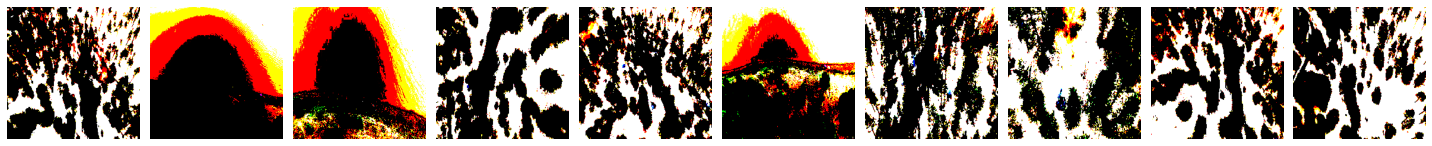

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:
#plotting images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [ ]:
#defininf layer of CNN 
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=1),
    Conv2D(filters=64, kernel_size=(4, 4), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=1),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=1),
    Flatten(),
    Dense(units=2, activation='sigmoid')
])

In [ ]:
#model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 223, 223, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 223, 223, 64)      32832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 222, 222, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 222, 222, 128)     73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 221, 221, 128)     0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6251648)          

In [ ]:
#compiling model with learning rate and loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting model to training data
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
#     verbose=2
)

Epoch 1/5
180/180 [==============================] - 691s 4s/step - loss: 86.8305 - accuracy: 0.8570 - val_loss: 14.5994 - val_accuracy: 0.9250
Epoch 2/5
180/180 [==============================] - 731s 4s/step - loss: 0.5949 - accuracy: 0.9934 - val_loss: 18.1248 - val_accuracy: 0.8300
Epoch 3/5
180/180 [==============================] - 601s 3s/step - loss: 0.0861 - accuracy: 0.9976 - val_loss: 10.4713 - val_accuracy: 0.9250
Epoch 4/5
180/180 [==============================] - 660s 4s/step - loss: 0.1031 - accuracy: 1.0000 - val_loss: 10.9379 - val_accuracy: 0.9250
Epoch 5/5
180/180 [==============================] - 659s 4s/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 14.0816 - val_accuracy: 0.9200


In [ ]:
#predicting test data
predictions = model.predict(x=test_batches, steps=len(test_batches))
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
#classes of test data
test_batches.class_indices

In [ ]:
cm_plot_labels = ['No_Fire','Fire']
#plotting confusion matrix
a = plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
#printing accuracy
print(classification_report(test_batches.classes, np.argmax(predictions, axis=-1), target_names=['No_Fire', 'Fire']))

In [ ]:

#vgg16 model for transfer learning
transfer_model = tf.keras.applications.vgg16.VGG16()

#creating new sequential model
model_transfer = Sequential()

#adding layers from vgg16 to new model
for layer in transfer_model.layers[:-1]:
    model_transfer.add(layer)

#setting layers to non-trainable    
for layer in model_transfer.layers:
    layer.trainable = False  
    

In [ ]:
model_transfer.add(Dense(units=2, activation='softmax'))

In [ ]:
model_transfer.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
#compiling transfer learnig model
model_transfer.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training transfer learning mdoel
model_transfer.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
#     verbose=2
)

In [ ]:
#prediction on test data
predictions_transfer = model_transfer.predict(x=test_batches, steps=len(test_batches), verbose=0)

#printing classifiction report
print(classification_report(test_batches.classes, np.argmax(predictions_transfer, axis=-1)))